# Title

---

In this notebook we will be analyzing the Open University Learning Analytics dataset. This dataset contains information about seven courses referred to as module, the students taking these courses, and their interactions with the courses. These courses were taken over the course of two years and offered Febuary and October of 2013 and 2014. The analysis of this dataset is done with the goal of discovering relationships between student features, course features and the overall student outcome. We will begin with exploring the data, which is distributed between seven CSV files, and then apply machine learning algorithms to see what relationships we can tease out. 

In [98]:
# import statements
import pandas as pd
import numpy as np
import os
from sklearn import linear_model
import seaborn as sns
import itertools
from varname.helpers import Wrapper
import matplotlib.pyplot as plt

In [99]:
# setting the path to the csv files
path = os.path.join(os.path.abspath(os.getcwd()), 'csvs\\')

student_info = pd.read_csv(path+'studentInfo.csv')
student_registration = pd.read_csv(path+'studentRegistration.csv')
courses = pd.read_csv(path+'courses.csv')
assessments = pd.read_csv(path+'assessments.csv')
student_assessment = pd.read_csv(path+'studentAssessment.csv')
student_vle = pd.read_csv(path+'studentVle.csv')
vle = pd.read_csv(path+'vle.csv')





In [100]:
# a fuction to print some basic analysis of dataframes
def analyze_df(df):
    print(f"Dataframe Length:\n\n{len(df)}\n\n")
    # print dataframe column data types
    print(f"Data Types:\n\n{df.dtypes}\n\n")
    # print which columns have null values and how many
    print(f"Null Data:\n\n{df.isnull().sum()}\n\n")
    # print the number of unique values per variable in data
    print(f"Unique Values:\n\n{df.nunique()}\n\n")
    # print duplicate values if there are any else prints "No Duplicate Values"
    if not df[df.duplicated()].empty:
        print(f"Duplicate Values:\n\n{df[df.duplicated()]}\n\n")
    else:
        print("No Duplicate Values")
    print(f"Numerical Variable Analysis:\n\n{df.describe()}\n\n")
    

#print the unique values of each column in a dataframe
def unique_vals(df):
    for i in df.columns:
        print(f"{i}: {df[i].explode().unique()}\n")
# a function to change dataframe column values based on a given dictionary
def change_col_val(val_dict, df):
    # val_dict is a dictionary of lists 
    for k, v in val_dict.items():
        for i in v:
            # change the value of the cell to its index number in a list
            df.loc[df[k] == i, k] = v.index(i)
            
# a function to get a percentage
def percentage(part, whole):
  return round(100 * float(part)/float(whole), 2)


Navigation:

* Cleaning:
    * [Student Info](#StudentInfo) 
    * [Student Registration](#StudentRegistration) 
    * [Courses](#Courses) 
    * [Assessments](#Assessments)
    * [Student Assessment](#StudentAssessment)
    * [Student VLE](#StudentVLE)
    * [VLE](#VLE) 


<h1>Cleaning and Analysis</h1>

---

Let's get to know our data!

Step by step we will clean and explore the student data here.
For each dataframe we will first Get a general look at our data frame looking at datatypes, null values, duplicate values, and unique values and perform cleaning based on what we find, then we will explore the information visually

<a id='Courses'></a>

---

<h2>Courses Dataframe</h2>

---

<h3>Cleaning</h3>

---

<h4>1. First Look</h4>

---

In [101]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


<b><u>Contents:</u></b>

* <b>code_module</b>: The code module represents the code name of the course. Modules are identified with three capital letters which run sequentially between AAA and GGG
* <b>code_presentation</b>: The code presentations are codified by their year and offering semester. B is for February and J is for October. 2013B for example is February of 2013. 
* <b>mode_presentation_length</b>: The module presentation length is the length of the course in days.

In [102]:
analyze_df(courses)

Dataframe Length:

22


Data Types:

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object


Null Data:

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64


Unique Values:

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64


No Duplicate Values
Numerical Variable Analysis:

       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000




In [103]:
pd.crosstab(index=courses['code_module'], columns=courses['code_presentation'])

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,0,1,0,1
BBB,1,1,1,1
CCC,0,0,1,1
DDD,1,1,1,1
EEE,0,1,1,1
FFF,1,1,1,1
GGG,0,1,1,1


<a id='StudentInfo'></a>

<h2>Student Info Dataframe</h2>

---

<h3>Cleaning</h3>

---

<h4>1. First Look</h4>

---

In [104]:
# looking at the student_info dataframe
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


<b><u>Contents:</u></b>

* <b>code_module</b>: The code module represents the course the student is taking.
* <b>code_presentation</b>: The code presentations are the year and semester the student is taking the course.
* <b>id_student</b>: The student ID is a unique identifier for each student
* <b>gender</b>: The gender represents the binary gender of a student 'M' for students who identify as male and 'F' for students who identify as female.
* <b>region</b>: Region represents the location of the student when they took the module. All regions are in the UK, Scotland, Ireland or Wales.
* <b>highest_education</b>: Highest education is representative of a students highest level of formal academic achievement.
    - Education levels in order from least to most formal education: 
        - No formal quals (qualifications)
        - Lower than A Level which is nearly but not quite analagous to under high school level
        - A Level or equivalent which is again nearly analagous to high school level, but more like college ready
        - HE Qualification which stands for higher education qualification
        - Post Graduate Qualification
* <b>imd_band</b>: The imd_band represents the Indices of multiple deprivation (IMD) score which is a commonly used method in the UK to measure poverty or deprivation in an area. The lower the score, the more 'deprived' the area is.
* <b>age_band</b>: There are only three bins for age; 0-35, 35-55 and over 55
* <b>num_of_prev_attempts</b>: The number of times the student has attempted the course previously.
* <b>studied_credits</b>: The number of credits for the module the student is taking.
* <b>disability</b>: Disability status is represented by a binary 'Y', yes a student does identify as having a disability and 'N', no a student does not identify as having a disability.
* <b>final_results</b>: * The final result is the students overall result in the class.
    - Possible Results include:
         - Pass: The student passed the course
         - Fail: The student did not pass the course
         - Withdraw: The student withdrew before the course term ended
         - Distinction: The student passed the class with distinction

studied_credits will not be a part of our analysis, and so may be removed.

Though the number of previous attempts may be interesting to analyze on its own to see the relationship between students who had to take the course multiple times, and the differences in their bahavior on the second or higher attempt, here we are only interested in students on their first attempt. The reason is that familiarity with course content is a confounding variable. Due to this we will remove students on their second or higher attempt. We will then remove num_prev_attempts since it will not contain any interesting data.

The dataframe columns can also be reordered to keep relevent data together. 

---

A Quick Aside to the Student Registration Dataframe!

---

In [105]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


<b><u>New Contents:</u></b>
* <b>date_registration</b> is the date that the student registered for the module relative to the start of the module. A negative value indicates that many days before the module began.
 
* <b>date_unregistration</b> is the date that the student unregistered from the course module in relation to the start date of the course. 

The student registration dataframe matches 1:1 with the student_info dataframe only adding the date the student registered and the date, if applicable, they unregistered, and so we will merge these two dataframes

In [106]:
student_info = student_info[student_info['num_of_prev_attempts'] == 0]

In [107]:
student_info = student_info[['code_module', 'code_presentation', 'id_student', 'region', 'imd_band', 'age_band', 'gender', 'highest_education', 'disability', 'final_result']]

In [108]:
student_info = student_info.merge(student_registration, how='left', on=['code_module', 'code_presentation', 'id_student'])

In [109]:
student_info.head()

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN
1,AAA,2013J,28400,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN
2,AAA,2013J,30268,North Western Region,30-40%,35-55,F,A Level or Equivalent,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN
4,AAA,2013J,32885,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN


In [110]:
# printing basic analysis of dataframe
print("Student Info\n")
analyze_df(student_info)

Student Info

Dataframe Length:

28421


Data Types:

code_module             object
code_presentation       object
id_student               int64
region                  object
imd_band                object
age_band                object
gender                  object
highest_education       object
disability              object
final_result            object
date_registration      float64
date_unregistration    float64
dtype: object


Null Data:

code_module                0
code_presentation          0
id_student                 0
region                     0
imd_band                 990
age_band                   0
gender                     0
highest_education          0
disability                 0
final_result               0
date_registration         38
date_unregistration    19809
dtype: int64


Unique Values:

code_module                7
code_presentation          4
id_student             26096
region                    13
imd_band                  10
age_band              

Notes:

* The imd_band variable has 990 null values which we may have to work around. 
* There are 19,809 null values for date_unregistration which represent the students that did not withdraw from the course. 
* There are 8,612 values for the count of unregistration which represents the number of students who withdrew from the course.
* We have 38 null values for date_registration, and no mention of this in the dataset documentation, so we will treat this as missing data.

id_student is currently an int64 datatype, but would be more appropriate as an object data type since it is categorical.

In [111]:
# changing id_student to the object data type
student_info['id_student'] = student_info['id_student'].astype(object)

The earliest unregistration date is 274 days before the course began, and so we must eliminate students who did not attend the course.

In [112]:
# removing students who withdrew on or before the first day
student_info = student_info.drop(student_info[(student_info['date_unregistration'] <= 0)].index)
student_info.reset_index()

,index,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
0,0,AAA,2013J,11391,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN
1,1,AAA,2013J,28400,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN
2,2,AAA,2013J,30268,North Western Region,30-40%,35-55,F,A Level or Equivalent,Y,Withdrawn,-92.0,12.0
3,3,AAA,2013J,31604,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN
4,4,AAA,2013J,32885,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25755,28416,GGG,2014J,2640965,Wales,10-20,0-35,F,Lower Than A Level,N,Fail,-4.0,NaN
25756,28417,GGG,2014J,2645731,East Anglian Region,40-50%,35-55,F,Lower Than A Level,N,Distinction,-23.0,NaN
25757,28418,GGG,2014J,2648187,South Region,20-30%,0-35,F,A Level or Equivalent,Y,Pass,-129.0,NaN
25758,28419,GGG,2014J,2679821,South East Region,90-100%,35-55,F,Lower Than A Level,N,Withdrawn,-49.0,101.0


The latest unregistration date is far beyond the date any of the courses went on for.

In [113]:
longest_course = courses['module_presentation_length'].max()
print(f"Longest Course: {longest_course} days")

# finding students whose courses went on for longer than the maximum course length
student_info.loc[student_info['date_unregistration'] > 269]

Longest Course: 269 days


,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
21812,FFF,2013J,586851,Wales,0-10%,0-35,M,Lower Than A Level,N,Withdrawn,-22.0,444.0


This seems to be an outlier, but should not affect our overall analysis so we will leave this intact

The dataframe length is 28,421 but there are only 26,096 unique student ID's. There are no duplicate records, so these students are likely enrolled in other courses at the same or different times.

In [114]:
student_info[student_info['id_student'].duplicated()]

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
11605,DDD,2013B,86047,Wales,20-30%,0-35,F,HE Qualification,N,Pass,-60.0,NaN
11624,DDD,2013B,131145,South West Region,40-50%,0-35,M,A Level or Equivalent,N,Pass,-103.0,NaN
11627,DDD,2013B,134025,London Region,60-70%,0-35,M,A Level or Equivalent,N,Distinction,-58.0,NaN
11639,DDD,2013B,163067,South East Region,40-50%,0-35,F,Lower Than A Level,N,Pass,-72.0,NaN
11641,DDD,2013B,165733,Scotland,20-30%,0-35,M,A Level or Equivalent,Y,Fail,-99.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
27020,GGG,2014B,501755,South Region,80-90%,0-35,M,Lower Than A Level,N,Pass,-60.0,NaN
27116,GGG,2014B,603921,East Midlands Region,60-70%,0-35,F,Lower Than A Level,N,Pass,-8.0,NaN
27368,GGG,2014B,624795,North Region,10-20,0-35,F,No Formal quals,N,Fail,-22.0,NaN
27400,GGG,2014B,626159,South West Region,60-70%,35-55,F,Lower Than A Level,Y,Pass,-45.0,NaN


In [115]:
# finding student records with duplicate ID's
pd.concat(x for _, x in student_info.groupby("id_student") if len(x) > 1)

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
9336,CCC,2014J,29411,East Midlands Region,80-90%,0-35,M,A Level or Equivalent,N,Withdrawn,-135.0,100.0
12626,DDD,2013J,29411,East Midlands Region,80-90%,0-35,M,A Level or Equivalent,N,Pass,-96.0,NaN
9338,CCC,2014J,29639,North Region,NaN,0-35,M,Lower Than A Level,N,Pass,-24.0,NaN
17721,EEE,2014B,29639,North Region,NaN,0-35,M,Lower Than A Level,N,Pass,-26.0,NaN
7397,CCC,2014B,29820,East Anglian Region,40-50%,0-35,M,HE Qualification,N,Pass,-57.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25963,FFF,2014J,2681198,East Anglian Region,70-80%,35-55,M,Lower Than A Level,N,Pass,-87.0,NaN
9325,CCC,2014B,2686578,Scotland,60-70%,0-35,M,A Level or Equivalent,N,Distinction,-23.0,NaN
14250,DDD,2013J,2686578,Scotland,60-70%,0-35,M,A Level or Equivalent,N,Distinction,-39.0,NaN
9330,CCC,2014B,2698535,Wales,50-60%,0-35,M,Lower Than A Level,N,Withdrawn,-156.0,180.0


We have 1956 students whose ID is listed more than once and a total of 3906 duplicate records. These do seem to be in different courses, and so we will leave them

In [116]:
analyze_df(student_info)

Dataframe Length:

25760


Data Types:

code_module             object
code_presentation       object
id_student              object
region                  object
imd_band                object
age_band                object
gender                  object
highest_education       object
disability              object
final_result            object
date_registration      float64
date_unregistration    float64
dtype: object


Null Data:

code_module                0
code_presentation          0
id_student                 0
region                     0
imd_band                 946
age_band                   0
gender                     0
highest_education          0
disability                 0
final_result               0
date_registration          9
date_unregistration    19809
dtype: int64


Unique Values:

code_module                7
code_presentation          4
id_student             23804
region                    13
imd_band                  10
age_band                   3
gender 

In [117]:
# changing all 10-20 values in student_info imd_band to 10-20% for consistency's sake
student_info.loc[student_info['imd_band'] == '10-20', 'imd_band'] = '10-20%'
print(student_info['imd_band'].explode().unique())

['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20%' '0-10%']


After this cleaning we are down to 25,760 relevent records

---

Let's take a look at the possible values for our categorical variables:

In [118]:
unique_vals(student_info)

code_module: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']

code_presentation: ['2013J' '2014J' '2013B' '2014B']

id_student: [11391 28400 30268 ... 2648187 2679821 2684003]

region: ['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']

imd_band: ['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20%' '0-10%']

age_band: ['55<=' '35-55' '0-35']

gender: ['M' 'F']

highest_education: ['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']

disability: ['N' 'Y']

final_result: ['Pass' 'Withdrawn' 'Fail' 'Distinction']

date_registration: [-159.  -53.  -92.  -52. -176. -110.  -67.  -29.  -33. -179. -103.  -47.
  -59.  -68. -180.  -95. -130.  -50. -107.  -27.  -31. -170.  -62. -100.
 -109.    5.  -43.  -26.  -32.  -99.  -82. -19

The 10-20 range for imd_band is missing its % sign. We will add that in for consistenct and clarity

In [119]:
# list of final_result possibilities
final_results = ['Fail', 'Pass', 'Withdrawn', 'Distinction']

# list of disability possibilities
disability = ['N', 'Y']

# list of region possibilities
regions = ['East Anglian Region', 'North Western Region',
 'South East Region', 'West Midlands Region', 'North Region',
 'South Region', 'South West Region', 'East Midlands Region',
 'Yorkshire Region', 'London Region', 'Wales', 'Scotland', 'Ireland']

# list of highest_education possibilities
highest_ed = ['No Formal quals', 'Lower Than A Level', 'A Level or Equivalent', 'HE Qualification', 'Post Graduate Qualification' ]

# list of imd_band possibilites
imd_bands = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']

# list of age_band possibilities
age_bands = ['0-35', '35-55', '55<=']

# list of code_module possibilities
code_mods = ['2013B', '2013J', '2014B', '2014J']

# list of gender possibilities
genders = ['M', 'F']

# dictionary mapping column string names to the above lists to pass to the change_col_val function
col_dict = {'imd_band':imd_bands, 'region':regions, 'disability':disability, 'age_band':age_bands, 'highest_education':highest_ed, 'gender':genders, 'final_result':final_results}

---

<h5>Code Modules</h5>

* Here we will figure out how many students are in each course. The frequency of each course is equivalent to the amount of students in the courses since the student ID's are unique.

In [120]:
student_info[['code_module']].value_counts(sort=False)

code_module
AAA             689
BBB            5856
CCC            3719
DDD            4604
EEE            2566
FFF            5943
GGG            2383
dtype: int64

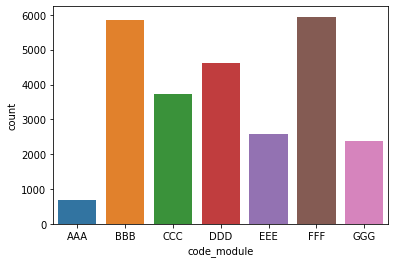

In [121]:
ax = sns.countplot(x="code_module", data=student_info)

---

<h5>Code Presentations</h5>

* The code presentation is the year and time of year the courses were offered. These are codified by the year they were offered (2013 or 2014) and the semester they were offered (February represented as B and October represented as J)
* For the code presentations, the data owner recommends that B and J presentations be analyzed seperately as the presentations may have been different. In some cases though, the author states it is necessary to supplement B with J material in vice versa in CCC EEE and GGG modules. We shall see how this affects our analysis later on.
* Here we will see how many students are in each presentation. The frequency of each presentation is also equivalent to the amount of students in the courses since the student ID's are unique.

In [157]:
student_info[['code_presentation']].value_counts(sort=False)

code_presentation
2013B                3494
2013J                7114
2014B                6009
2014J                9143
dtype: int64

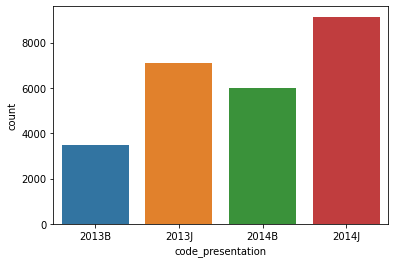

In [387]:
ax = sns.countplot(x="code_presentation", data=student_info, order=code_mods)

In [388]:
student_info.head()

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN
1,AAA,2013J,28400,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN
2,AAA,2013J,30268,North Western Region,30-40%,35-55,F,A Level or Equivalent,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN
4,AAA,2013J,32885,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN


---

<h5>Region</h5>


* Here we will see how many students we have from each region

In [389]:
student_info[['region']].value_counts()

region              
Scotland                2807
East Anglian Region     2649
South Region            2493
London Region           2481
North Western Region    2226
South West Region       1955
West Midlands Region    1949
East Midlands Region    1834
Wales                   1683
South East Region       1664
Yorkshire Region        1588
North Region            1440
Ireland                  991
dtype: int64

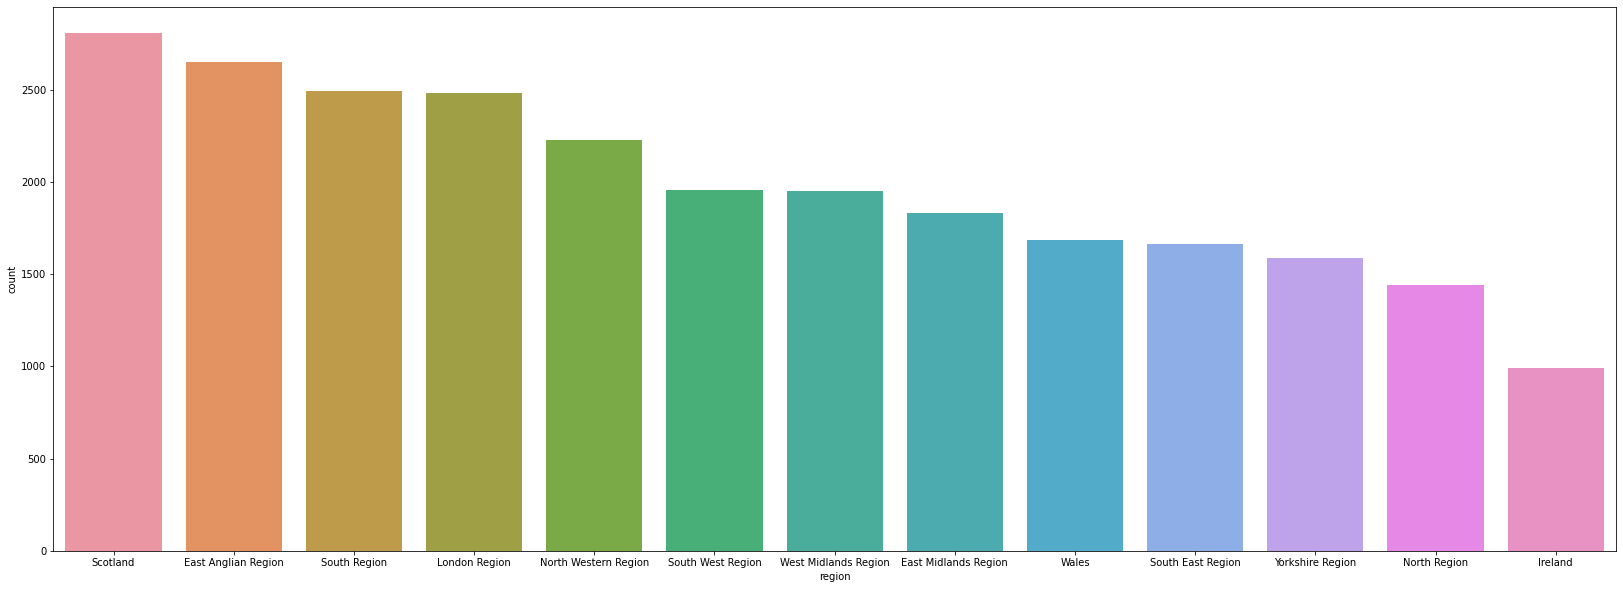

In [390]:
fig_dims = (28, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sorted_regions = student_info['region'].value_counts().sort_values(ascending=False).index.values
ax = sns.countplot(x="region", data=student_info, order=sorted_regions)

---

<h5>IMD Band</h5>


* As mentioned above, the imd_band variable has 1,111 null values and those values will not be counted in this analysis.

In [391]:
# getting the count of students we have the information for and figuring out what percent of total students that is
total_imd = student_info['imd_band'].count()
percentage_imd = percentage(total_imd, total_students)
print(f"We have IMD information for {total_imd} students, which is {percentage_imd}% of our students.")

NameError: name 'total_students' is not defined

In [392]:
# looking at the counts of students in each range
student_info[['imd_band']].value_counts()

imd_band
20-30%      2823
30-40%      2800
10-20%      2679
40-50%      2557
50-60%      2507
0-10%       2454
70-80%      2359
60-70%      2340
80-90%      2204
90-100%     2091
dtype: int64

In [393]:
# figuring out how many students fall under the 50% range
# only counting up to 40-50% mark for our data
total_imd_under_50 = 0
for i in imd_bands[0:5]:
    total_imd_under_50 += student_info[['imd_band']].value_counts()[i]

# getting our imd number as a percentage
perc_imd_under_50 = percentage(total_imd_under_50, total_imd)

print(f"{perc_imd_under_50}% of students come from areas under the 50% IMD figure")

53.65% of students come from areas under the 50% IMD figure


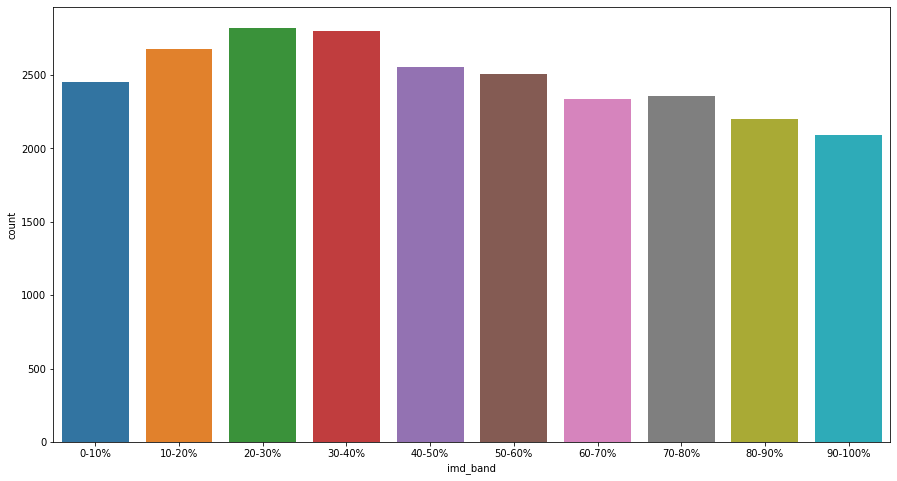

In [394]:
# plotting imd data
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="imd_band", data=student_info, order=imd_bands)

This graph shows that the bulk of our students are from areas under the 50% mark for the meausurement, so we have more students from more impoverished areas than not.

This information can be important in assuming certain priviliged knowledge or skills among students, which could give some students an unfair advantage.

---

<h5>Age Bands</h5>


In [395]:
student_info[['age_band']].value_counts()

age_band
0-35        18051
35-55        7525
55<=          184
dtype: int64

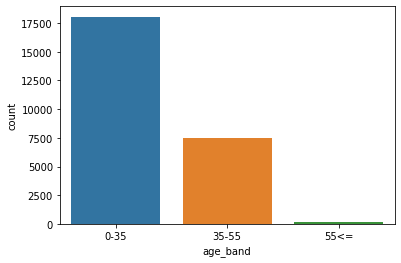

In [396]:
# plotting imd data
ax = sns.countplot(x="age_band", data=student_info, order=age_bands)

---

<h5>Gender</h5>

* Here we will see our gender ratio and counts:

In [397]:
# getting the number of males and females in our dataframe
males = student_info[['gender']].value_counts()['M']
females = student_info[['gender']].value_counts()['F']

# figuring out the percentage of males and females to the whole
percentage_males = percentage(males, total_students)
percentage_females = percentage(females, total_students)

NameError: name 'total_students' is not defined

In [398]:
print(f"{males} or {percentage_males}% of the students are male.")
print(f"{females} or {percentage_females}% of the students are female.")

NameError: name 'percentage_males' is not defined

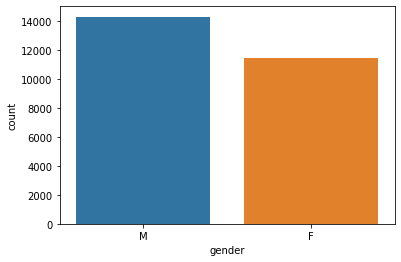

In [399]:
# plotting the gender distribution
ax = sns.countplot(x="gender", data=student_info)


* We have more males than females in this dataset, but a fairly every distribution


---

<h5>Highest Education</h5>

In [400]:
student_info[['highest_education']].value_counts()

highest_education          
A Level or Equivalent          11244
Lower Than A Level             10110
HE Qualification                3888
Post Graduate Qualification      262
No Formal quals                  256
dtype: int64

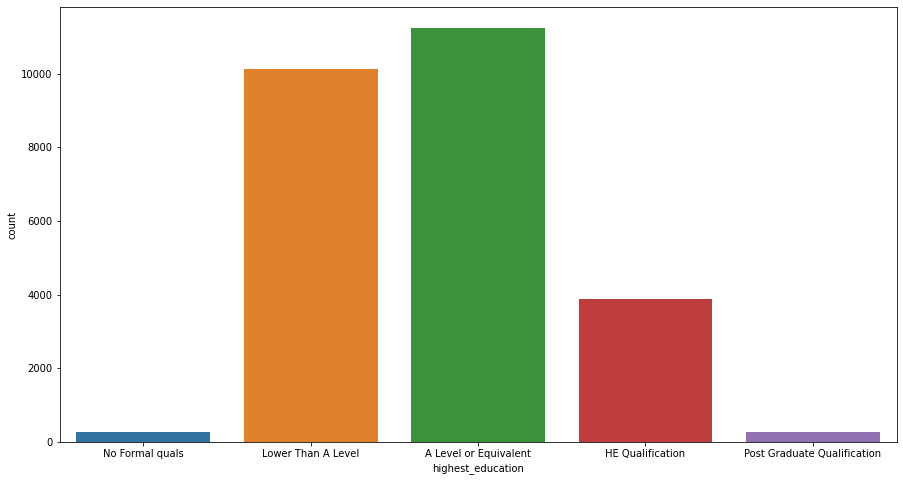

In [401]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="highest_education", data=student_info, order=highest_ed)

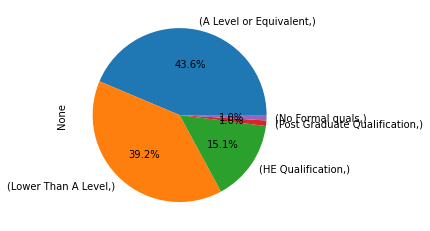

In [402]:
student_info[['highest_education']].value_counts().plot.pie(autopct="%.1f%%", subplots=True);

---

<h5> Disability Status</h5>

* Knowing how many differently abled students make up you class is important in order to better understand and accommadate different needs.

In [403]:
# getting the number and percentage of students who identified as having a disability
number_disability = student_info[['disability']].value_counts()['Y']
percentage_disability = percentage(number_disability, total_students)

print(f"{number_disability} students or {percentage_disability}% of students identify as disabled.")

NameError: name 'total_students' is not defined

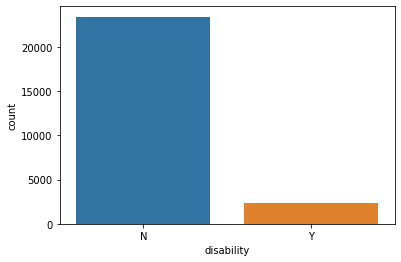

In [404]:
ax = sns.countplot(x="disability", data=student_info)

---

<h5>Final Result</h5>



In [405]:
student_info[['final_result']].value_counts()

final_result
Pass            11148
Withdrawn        6030
Fail             5725
Distinction      2857
dtype: int64

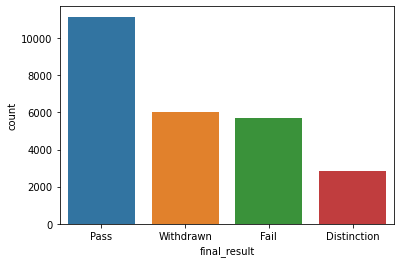

In [406]:
ax = sns.countplot(x="final_result", data=student_info)

<a id='Assessments'></a>

---

<h2>Assessments Dataframe</h2>

---

<h3>Cleaning</h3>

---

<h4>1. Look at the dataframe</h4>

---

In [122]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [123]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [124]:
student_assessment = student_assessment.drop(columns='is_banked')

---

<h4>2. Remove unnecessary variables</h4>

---


We will merge the student_assessment and assessments dataframes, matching the records by the assessment ID to have one dataframe with the assessment information.

In [125]:
# merges dataframes student_assessment with assessments with a right join on their common ID id_assessment
# creates a colum _merge which tells you if the id_assessment was found in one or both dataframes
merged_assessments = student_assessment.merge(assessments, how='right', on=['id_assessment'],indicator=True)
merged_assessments.head()

,id_assessment,id_student,date_submitted,score,code_module,code_presentation,assessment_type,date,weight,_merge
0,1752,11391.0,18.0,78.0,AAA,2013J,TMA,19.0,10.0,both
1,1752,28400.0,22.0,70.0,AAA,2013J,TMA,19.0,10.0,both
2,1752,31604.0,17.0,72.0,AAA,2013J,TMA,19.0,10.0,both
3,1752,32885.0,26.0,69.0,AAA,2013J,TMA,19.0,10.0,both
4,1752,38053.0,19.0,79.0,AAA,2013J,TMA,19.0,10.0,both


In [126]:
merged_assessments.loc[merged_assessments['_merge'] == 'right_only']

,id_assessment,id_student,date_submitted,score,code_module,code_presentation,assessment_type,date,weight,_merge
1633,1757,NaN,NaN,NaN,AAA,2013J,Exam,NaN,100.0,right_only
3150,1763,NaN,NaN,NaN,AAA,2014J,Exam,NaN,100.0,right_only
14407,14990,NaN,NaN,NaN,BBB,2013B,Exam,NaN,100.0,right_only
28783,15002,NaN,NaN,NaN,BBB,2013J,Exam,NaN,100.0,right_only
38777,15014,NaN,NaN,NaN,BBB,2014B,Exam,NaN,100.0,right_only
46186,15025,NaN,NaN,NaN,BBB,2014J,Exam,NaN,100.0,right_only
53676,40087,NaN,NaN,NaN,CCC,2014B,Exam,NaN,100.0,right_only
65128,40088,NaN,NaN,NaN,CCC,2014J,Exam,NaN,100.0,right_only
98877,30713,NaN,NaN,NaN,EEE,2013J,Exam,235.0,100.0,right_only
100658,30718,NaN,NaN,NaN,EEE,2014B,Exam,228.0,100.0,right_only


This subset consists of exams which exist in assessments, but none of the students in student_assessment have taken. Since there is no student data mapped to these exams we will drop them.

In [127]:
# remove tests that students did not take
assessments = merged_assessments.dropna(subset=['id_student'])
# reset the index to be consecutive again
assessments = assessments.reset_index(drop=True)

In [128]:
assessments.head()

,id_assessment,id_student,date_submitted,score,code_module,code_presentation,assessment_type,date,weight,_merge
0,1752,11391.0,18.0,78.0,AAA,2013J,TMA,19.0,10.0,both
1,1752,28400.0,22.0,70.0,AAA,2013J,TMA,19.0,10.0,both
2,1752,31604.0,17.0,72.0,AAA,2013J,TMA,19.0,10.0,both
3,1752,32885.0,26.0,69.0,AAA,2013J,TMA,19.0,10.0,both
4,1752,38053.0,19.0,79.0,AAA,2013J,TMA,19.0,10.0,both


Now we have a dataframe of students which we have the exam data for mapped to the exam type, date and weight

In [129]:
assessments[assessments['date'].isna()]

,id_assessment,id_student,date_submitted,score,code_module,code_presentation,assessment_type,date,weight,_merge
52923,24290,558914.0,230.0,32.0,CCC,2014B,Exam,NaN,100.0,both
52924,24290,559706.0,234.0,78.0,CCC,2014B,Exam,NaN,100.0,both
52925,24290,559770.0,230.0,54.0,CCC,2014B,Exam,NaN,100.0,both
52926,24290,560114.0,230.0,64.0,CCC,2014B,Exam,NaN,100.0,both
52927,24290,560311.0,234.0,100.0,CCC,2014B,Exam,NaN,100.0,both
...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680.0,243.0,91.0,DDD,2014J,Exam,NaN,100.0,both
95981,25368,652732.0,249.0,47.0,DDD,2014J,Exam,NaN,100.0,both
95982,25368,652965.0,242.0,87.0,DDD,2014J,Exam,NaN,100.0,both
95983,25368,653051.0,242.0,27.0,DDD,2014J,Exam,NaN,100.0,both


In [130]:
analyze_df(assessments)

Dataframe Length:

173912


Data Types:

id_assessment           int64
id_student            float64
date_submitted        float64
score                 float64
code_module            object
code_presentation      object
assessment_type        object
date                  float64
weight                float64
_merge               category
dtype: object


Null Data:

id_assessment           0
id_student              0
date_submitted          0
score                 173
code_module             0
code_presentation       0
assessment_type         0
date                 2865
weight                  0
_merge                  0
dtype: int64


Unique Values:

id_assessment          188
id_student           23369
date_submitted         312
score                  101
code_module              7
code_presentation        4
assessment_type          3
date                    72
weight                  24
_merge                   1
dtype: int64


No Duplicate Values
Numerical Variable Analysis:

     

We have 2,873 null data points for assessment date. The documentation of this dataset states that if the exam date is missing then it is as the end of the last presentation week. We can find this information in the courses dataframe.

In [131]:
# adding the dates for the null test dates
for index, row in assessments[assessments['date'].isna()].iterrows():
    assessments.at[index, 'date'] = courses.loc[(courses['code_module'] == row['code_module']) & (courses['code_presentation'] == row['code_presentation']), 'module_presentation_length']

In [132]:
assessments = assessments[['code_module', 'code_presentation', 'id_student', 'id_assessment', 'assessment_type', 'weight', 'date', 'date_submitted', 'score']]

There are 173 records with missing scores. These are not of much interest to us, since score is what we are trying to find the relationship for.

In [133]:
assessments = assessments.dropna(subset=['score'])

In [134]:
# converting the data types back
assessments = assessments.astype({'id_assessment': object, 'id_student': object})

In [135]:
assessments.head()

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score
0,AAA,2013J,11391.0,1752,TMA,10.0,19.0,18.0,78.0
1,AAA,2013J,28400.0,1752,TMA,10.0,19.0,22.0,70.0
2,AAA,2013J,31604.0,1752,TMA,10.0,19.0,17.0,72.0
3,AAA,2013J,32885.0,1752,TMA,10.0,19.0,26.0,69.0
4,AAA,2013J,38053.0,1752,TMA,10.0,19.0,19.0,79.0


In [136]:
analyze_df(assessments)

Dataframe Length:

173739


Data Types:

code_module           object
code_presentation     object
id_student            object
id_assessment         object
assessment_type       object
weight               float64
date                 float64
date_submitted       float64
score                float64
dtype: object


Null Data:

code_module          0
code_presentation    0
id_student           0
id_assessment        0
assessment_type      0
weight               0
date                 0
date_submitted       0
score                0
dtype: int64


Unique Values:

code_module              7
code_presentation        4
id_student           23351
id_assessment          188
assessment_type          3
weight                  24
date                    74
date_submitted         309
score                  101
dtype: int64


No Duplicate Values
Numerical Variable Analysis:

              weight           date  date_submitted          score
count  173739.000000  173739.000000   173739.000000  1737

In order to remove the students that we removed for the number of previous attempts, we must merge assessments and student info and find the difference

In [137]:
merged_sia = assessments.merge(student_info, how='left', on=['id_student', 'code_module', 'code_presentation'], indicator=True)
merged_sia

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,_merge
0,AAA,2013J,11391.0,1752,TMA,10.0,19.0,18.0,78.0,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN,both
1,AAA,2013J,28400.0,1752,TMA,10.0,19.0,22.0,70.0,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN,both
2,AAA,2013J,31604.0,1752,TMA,10.0,19.0,17.0,72.0,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN,both
3,AAA,2013J,32885.0,1752,TMA,10.0,19.0,26.0,69.0,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN,both
4,AAA,2013J,38053.0,1752,TMA,10.0,19.0,19.0,79.0,Wales,80-90%,35-55,M,A Level or Equivalent,N,Pass,-110.0,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173734,GGG,2014J,652462.0,37437,TMA,0.0,173.0,172.0,60.0,South Region,90-100%,35-55,M,Lower Than A Level,N,Pass,-115.0,NaN,both
173735,GGG,2014J,652539.0,37437,TMA,0.0,173.0,176.0,75.0,South Region,70-80%,0-35,F,A Level or Equivalent,N,Pass,-85.0,NaN,both
173736,GGG,2014J,653157.0,37437,TMA,0.0,173.0,187.0,70.0,West Midlands Region,20-30%,0-35,F,Lower Than A Level,N,Pass,-46.0,NaN,both
173737,GGG,2014J,653252.0,37437,TMA,0.0,173.0,171.0,70.0,East Anglian Region,20-30%,0-35,F,No Formal quals,Y,Pass,-78.0,NaN,both


In [138]:
merged_sia.loc[merged_sia['_merge'] == 'left_only']

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,_merge
1639,AAA,2014J,603861.0,1758,TMA,10.0,19.0,-1.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1654,AAA,2014J,721259.0,1758,TMA,10.0,19.0,19.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1661,AAA,2014J,1352868.0,1758,TMA,10.0,19.0,19.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1663,AAA,2014J,1456619.0,1758,TMA,10.0,19.0,26.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1665,AAA,2014J,1472925.0,1758,TMA,10.0,19.0,18.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173578,GGG,2014J,627812.0,37437,TMA,0.0,173.0,168.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
173579,GGG,2014J,628299.0,37437,TMA,0.0,173.0,170.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
173580,GGG,2014J,629258.0,37437,TMA,0.0,173.0,202.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
173581,GGG,2014J,631446.0,37437,TMA,0.0,173.0,-1.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [139]:
assessments = merged_sia.dropna(subset=['final_result'])

In [140]:
assessments.reset_index(drop=True)

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,_merge
0,AAA,2013J,11391.0,1752,TMA,10.0,19.0,18.0,78.0,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN,both
1,AAA,2013J,28400.0,1752,TMA,10.0,19.0,22.0,70.0,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN,both
2,AAA,2013J,31604.0,1752,TMA,10.0,19.0,17.0,72.0,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN,both
3,AAA,2013J,32885.0,1752,TMA,10.0,19.0,26.0,69.0,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN,both
4,AAA,2013J,38053.0,1752,TMA,10.0,19.0,19.0,79.0,Wales,80-90%,35-55,M,A Level or Equivalent,N,Pass,-110.0,NaN,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153523,GGG,2014J,652462.0,37437,TMA,0.0,173.0,172.0,60.0,South Region,90-100%,35-55,M,Lower Than A Level,N,Pass,-115.0,NaN,both
153524,GGG,2014J,652539.0,37437,TMA,0.0,173.0,176.0,75.0,South Region,70-80%,0-35,F,A Level or Equivalent,N,Pass,-85.0,NaN,both
153525,GGG,2014J,653157.0,37437,TMA,0.0,173.0,187.0,70.0,West Midlands Region,20-30%,0-35,F,Lower Than A Level,N,Pass,-46.0,NaN,both
153526,GGG,2014J,653252.0,37437,TMA,0.0,173.0,171.0,70.0,East Anglian Region,20-30%,0-35,F,No Formal quals,Y,Pass,-78.0,NaN,both


In [141]:
assessments = assessments.drop(columns='_merge')

In [142]:
analyze_df(assessments)

Dataframe Length:

153528


Data Types:

code_module             object
code_presentation       object
id_student              object
id_assessment           object
assessment_type         object
weight                 float64
date                   float64
date_submitted         float64
score                  float64
region                  object
imd_band                object
age_band                object
gender                  object
highest_education       object
disability              object
final_result            object
date_registration      float64
date_unregistration    float64
dtype: object


Null Data:

code_module                 0
code_presentation           0
id_student                  0
id_assessment               0
assessment_type             0
weight                      0
date                        0
date_submitted              0
score                       0
region                      0
imd_band                 6892
age_band                    0
gender       

* Put this up with student info

In [143]:
# student_info = student_info.drop(columns=['date_registration', 'date_unregistration'])

In [144]:
student_info

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN
1,AAA,2013J,28400,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN
2,AAA,2013J,30268,North Western Region,30-40%,35-55,F,A Level or Equivalent,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN
4,AAA,2013J,32885,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28416,GGG,2014J,2640965,Wales,10-20%,0-35,F,Lower Than A Level,N,Fail,-4.0,NaN
28417,GGG,2014J,2645731,East Anglian Region,40-50%,35-55,F,Lower Than A Level,N,Distinction,-23.0,NaN
28418,GGG,2014J,2648187,South Region,20-30%,0-35,F,A Level or Equivalent,Y,Pass,-129.0,NaN
28419,GGG,2014J,2679821,South East Region,90-100%,35-55,F,Lower Than A Level,N,Withdrawn,-49.0,101.0


In [145]:
assessments

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391.0,1752,TMA,10.0,19.0,18.0,78.0,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN
1,AAA,2013J,28400.0,1752,TMA,10.0,19.0,22.0,70.0,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN
2,AAA,2013J,31604.0,1752,TMA,10.0,19.0,17.0,72.0,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN
3,AAA,2013J,32885.0,1752,TMA,10.0,19.0,26.0,69.0,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN
4,AAA,2013J,38053.0,1752,TMA,10.0,19.0,19.0,79.0,Wales,80-90%,35-55,M,A Level or Equivalent,N,Pass,-110.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173734,GGG,2014J,652462.0,37437,TMA,0.0,173.0,172.0,60.0,South Region,90-100%,35-55,M,Lower Than A Level,N,Pass,-115.0,NaN
173735,GGG,2014J,652539.0,37437,TMA,0.0,173.0,176.0,75.0,South Region,70-80%,0-35,F,A Level or Equivalent,N,Pass,-85.0,NaN
173736,GGG,2014J,653157.0,37437,TMA,0.0,173.0,187.0,70.0,West Midlands Region,20-30%,0-35,F,Lower Than A Level,N,Pass,-46.0,NaN
173737,GGG,2014J,653252.0,37437,TMA,0.0,173.0,171.0,70.0,East Anglian Region,20-30%,0-35,F,No Formal quals,Y,Pass,-78.0,NaN


In [146]:
no_test_scores = assessments.merge(student_info, how='right', on=['id_student', 'code_module', 'code_presentation', 'region', 'imd_band', 'age_band', 'gender', 'highest_education', 'disability', 'final_result', 'date_registration', 'date_unregistration'], indicator=True)
no_test_scores = no_test_scores.loc[no_test_scores['_merge'] == 'right_only']

In [147]:
no_test_scores

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,_merge
10,AAA,2013J,30268,NaN,NaN,NaN,NaN,NaN,NaN,North Western Region,30-40%,35-55,F,A Level or Equivalent,Y,Withdrawn,-92.0,12.0,right_only
202,AAA,2013J,135335,NaN,NaN,NaN,NaN,NaN,NaN,East Anglian Region,20-30%,0-35,F,Lower Than A Level,N,Withdrawn,-29.0,30.0,right_only
515,AAA,2013J,281589,NaN,NaN,NaN,NaN,NaN,NaN,North Western Region,30-40%,0-35,M,HE Qualification,N,Fail,-50.0,NaN,right_only
731,AAA,2013J,346843,NaN,NaN,NaN,NaN,NaN,NaN,Scotland,50-60%,35-55,F,HE Qualification,N,Fail,-44.0,NaN,right_only
737,AAA,2013J,354858,NaN,NaN,NaN,NaN,NaN,NaN,South Region,90-100%,35-55,M,HE Qualification,N,Withdrawn,-32.0,5.0,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156595,GGG,2014J,2282141,NaN,NaN,NaN,NaN,NaN,NaN,Wales,0-10%,35-55,M,A Level or Equivalent,N,Withdrawn,-32.0,62.0,right_only
156605,GGG,2014J,2338614,NaN,NaN,NaN,NaN,NaN,NaN,Scotland,0-10%,35-55,F,A Level or Equivalent,Y,Withdrawn,-23.0,58.0,right_only
156624,GGG,2014J,2475886,NaN,NaN,NaN,NaN,NaN,NaN,East Anglian Region,40-50%,35-55,F,Lower Than A Level,N,Fail,-31.0,NaN,right_only
156652,GGG,2014J,2608143,NaN,NaN,NaN,NaN,NaN,NaN,East Midlands Region,60-70%,35-55,M,HE Qualification,N,Withdrawn,-45.0,48.0,right_only


In [148]:
no_test_scores[no_test_scores['final_result']=='Pass']

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,_merge
2674,AAA,2014J,1336190,NaN,NaN,NaN,NaN,NaN,NaN,London Region,80-90%,55<=,M,HE Qualification,N,Pass,-23.0,NaN,right_only
58389,CCC,2014J,1777834,NaN,NaN,NaN,NaN,NaN,NaN,East Anglian Region,80-90%,35-55,F,A Level or Equivalent,N,Pass,NaN,NaN,right_only
88271,EEE,2013J,608472,NaN,NaN,NaN,NaN,NaN,NaN,North Western Region,50-60%,0-35,M,Lower Than A Level,N,Pass,-22.0,NaN,right_only


In [149]:
student_info

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN
1,AAA,2013J,28400,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN
2,AAA,2013J,30268,North Western Region,30-40%,35-55,F,A Level or Equivalent,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN
4,AAA,2013J,32885,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28416,GGG,2014J,2640965,Wales,10-20%,0-35,F,Lower Than A Level,N,Fail,-4.0,NaN
28417,GGG,2014J,2645731,East Anglian Region,40-50%,35-55,F,Lower Than A Level,N,Distinction,-23.0,NaN
28418,GGG,2014J,2648187,South Region,20-30%,0-35,F,A Level or Equivalent,Y,Pass,-129.0,NaN
28419,GGG,2014J,2679821,South East Region,90-100%,35-55,F,Lower Than A Level,N,Withdrawn,-49.0,101.0


In [152]:
vle = vle.drop(columns=['week_from', 'week_to'])

KeyError: "['week_from' 'week_to'] not found in axis"

In [153]:
# merging vle & student vle
merged_vle = student_vle.merge(vle, how='right', on=['id_site', 'code_module', 'code_presentation'],indicator=True)

In [154]:
merged_vle.loc[merged_vle['_merge'] == 'right_only']

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,_merge
33657,AAA,2013J,NaN,546897,NaN,NaN,url,right_only
45752,AAA,2013J,NaN,546872,NaN,NaN,subpage,right_only
185284,AAA,2014J,NaN,1032910,NaN,NaN,url,right_only
232606,AAA,2014J,NaN,1072237,NaN,NaN,url,right_only
233416,AAA,2014J,NaN,1027118,NaN,NaN,url,right_only
...,...,...,...,...,...,...,...,...
8679469,FFF,2014B,NaN,779622,NaN,NaN,subpage,right_only
8848046,FFF,2014B,NaN,924222,NaN,NaN,forumng,right_only
9297154,FFF,2014J,NaN,1072239,NaN,NaN,forumng,right_only
9447743,FFF,2014J,NaN,883074,NaN,NaN,subpage,right_only


This represents materials which we have no student activity associated withh

In [155]:
merged_vle = merged_vle.dropna(subset=['id_student'])

In [156]:
merged_vle = merged_vle.drop(columns=['_merge'])

In [157]:
vle = merged_vle

In [158]:
vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,75091.0,546943,-10.0,1.0,resource
1,AAA,2013J,186149.0,546943,-10.0,1.0,resource
2,AAA,2013J,205350.0,546943,-10.0,2.0,resource
3,AAA,2013J,1626710.0,546943,-9.0,1.0,resource
4,AAA,2013J,2643002.0,546943,-8.0,1.0,resource


In [159]:
analyze_df(vle)

Dataframe Length:

10655280


Data Types:

code_module           object
code_presentation     object
id_student           float64
id_site                int64
date                 float64
sum_click            float64
activity_type         object
dtype: object


Null Data:

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
activity_type        0
dtype: int64


Unique Values:

code_module              7
code_presentation        4
id_student           26074
id_site               6268
date                   295
sum_click              498
activity_type           20
dtype: int64


Duplicate Values:

         code_module code_presentation  id_student  id_site   date  sum_click  \
34171            AAA             2013J    104476.0   546678  220.0        3.0   
34189            AAA             2013J   2458355.0   546678  231.0        3.0   
34770            AAA             2013J   1970390.0   546675  235.0  

In [160]:
vle = vle.reset_index(drop=True)

In [161]:
# pd.concat(x for _, x in vle.groupby(['id_student',"date"]) if len(x) > 1)[0:50]

In [162]:
aggregates = {'sum_click':'sum', 'code_module':'first', 'code_presentation':'first'}

In [163]:
vle = vle.groupby(['id_student']).aggregate(aggregates).reset_index()

In [164]:
vle.head()

,id_student,sum_click,code_module,code_presentation
0,6516.0,2791.0,AAA,2014J
1,8462.0,656.0,DDD,2013J
2,11391.0,934.0,AAA,2013J
3,23629.0,161.0,BBB,2013B
4,23698.0,910.0,CCC,2014J


In [165]:
merged_vle_si = student_info.merge(vle, how='right', on=['id_student', 'code_module', 'code_presentation'],indicator=True)

In [166]:
merged_vle_si

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,sum_click,_merge
0,AAA,2014J,6516.0,Scotland,80-90%,55<=,M,HE Qualification,N,Pass,-52.0,NaN,2791.0,both
1,DDD,2013J,8462.0,London Region,30-40%,55<=,M,HE Qualification,N,Withdrawn,-137.0,119.0,656.0,both
2,AAA,2013J,11391.0,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN,934.0,both
3,BBB,2013B,23629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.0,right_only
4,CCC,2014J,23698.0,East Anglian Region,50-60%,0-35,F,A Level or Equivalent,N,Pass,-110.0,NaN,910.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26069,DDD,2014B,2698251.0,South West Region,50-60%,0-35,F,A Level or Equivalent,N,Fail,-23.0,NaN,1511.0,both
26070,AAA,2013J,2698257.0,East Midlands Region,60-70%,0-35,M,Lower Than A Level,N,Pass,-58.0,NaN,758.0,both
26071,CCC,2014B,2698535.0,Wales,50-60%,0-35,M,Lower Than A Level,N,Withdrawn,-156.0,180.0,4241.0,both
26072,BBB,2014J,2698577.0,Wales,50-60%,35-55,F,Lower Than A Level,N,Fail,16.0,NaN,717.0,both


In [167]:
assessments

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391.0,1752,TMA,10.0,19.0,18.0,78.0,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN
1,AAA,2013J,28400.0,1752,TMA,10.0,19.0,22.0,70.0,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN
2,AAA,2013J,31604.0,1752,TMA,10.0,19.0,17.0,72.0,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN
3,AAA,2013J,32885.0,1752,TMA,10.0,19.0,26.0,69.0,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN
4,AAA,2013J,38053.0,1752,TMA,10.0,19.0,19.0,79.0,Wales,80-90%,35-55,M,A Level or Equivalent,N,Pass,-110.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173734,GGG,2014J,652462.0,37437,TMA,0.0,173.0,172.0,60.0,South Region,90-100%,35-55,M,Lower Than A Level,N,Pass,-115.0,NaN
173735,GGG,2014J,652539.0,37437,TMA,0.0,173.0,176.0,75.0,South Region,70-80%,0-35,F,A Level or Equivalent,N,Pass,-85.0,NaN
173736,GGG,2014J,653157.0,37437,TMA,0.0,173.0,187.0,70.0,West Midlands Region,20-30%,0-35,F,Lower Than A Level,N,Pass,-46.0,NaN
173737,GGG,2014J,653252.0,37437,TMA,0.0,173.0,171.0,70.0,East Anglian Region,20-30%,0-35,F,No Formal quals,Y,Pass,-78.0,NaN


In [168]:
merged_vle_si.loc[merged_vle_si['_merge'] == 'right_only']

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,sum_click,_merge
3,BBB,2013B,23629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.0,right_only
7,DDD,2014B,24213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992.0,right_only
13,DDD,2014J,25572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,right_only
14,BBB,2014B,25629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,right_only
15,BBB,2014B,25997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26054,FFF,2013J,2694680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,right_only
26061,DDD,2014B,2696376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,282.0,right_only
26063,FFF,2013J,2697608.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,right_only
26064,FFF,2014B,2697630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1109.0,right_only


In [169]:
merged_vle_si = merged_vle_si.dropna(subset=['region'])

In [170]:
merged_vle_si

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,sum_click,_merge
0,AAA,2014J,6516.0,Scotland,80-90%,55<=,M,HE Qualification,N,Pass,-52.0,NaN,2791.0,both
1,DDD,2013J,8462.0,London Region,30-40%,55<=,M,HE Qualification,N,Withdrawn,-137.0,119.0,656.0,both
2,AAA,2013J,11391.0,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN,934.0,both
4,CCC,2014J,23698.0,East Anglian Region,50-60%,0-35,F,A Level or Equivalent,N,Pass,-110.0,NaN,910.0,both
5,BBB,2013J,23798.0,Wales,50-60%,0-35,M,A Level or Equivalent,N,Distinction,-27.0,NaN,590.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26069,DDD,2014B,2698251.0,South West Region,50-60%,0-35,F,A Level or Equivalent,N,Fail,-23.0,NaN,1511.0,both
26070,AAA,2013J,2698257.0,East Midlands Region,60-70%,0-35,M,Lower Than A Level,N,Pass,-58.0,NaN,758.0,both
26071,CCC,2014B,2698535.0,Wales,50-60%,0-35,M,Lower Than A Level,N,Withdrawn,-156.0,180.0,4241.0,both
26072,BBB,2014J,2698577.0,Wales,50-60%,35-55,F,Lower Than A Level,N,Fail,16.0,NaN,717.0,both


In [188]:
student_info

,code_module,code_presentation,id_student,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN
1,AAA,2013J,28400,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN
2,AAA,2013J,30268,North Western Region,30-40%,35-55,F,A Level or Equivalent,Y,Withdrawn,-92.0,12.0
3,AAA,2013J,31604,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN
4,AAA,2013J,32885,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28416,GGG,2014J,2640965,Wales,10-20%,0-35,F,Lower Than A Level,N,Fail,-4.0,NaN
28417,GGG,2014J,2645731,East Anglian Region,40-50%,35-55,F,Lower Than A Level,N,Distinction,-23.0,NaN
28418,GGG,2014J,2648187,South Region,20-30%,0-35,F,A Level or Equivalent,Y,Pass,-129.0,NaN
28419,GGG,2014J,2679821,South East Region,90-100%,35-55,F,Lower Than A Level,N,Withdrawn,-49.0,101.0


In [195]:
vle = merged_vle_si[['code_module', 'code_presentation', 'region', 'imd_band', 'id_student', 'age_band','gender','highest_education', 'disability', 'sum_click', 'final_result']]

In [196]:
vle

,code_module,code_presentation,region,imd_band,id_student,age_band,gender,highest_education,disability,sum_click,final_result
0,AAA,2014J,Scotland,80-90%,6516.0,55<=,M,HE Qualification,N,2791.0,Pass
1,DDD,2013J,London Region,30-40%,8462.0,55<=,M,HE Qualification,N,656.0,Withdrawn
2,AAA,2013J,East Anglian Region,90-100%,11391.0,55<=,M,HE Qualification,N,934.0,Pass
4,CCC,2014J,East Anglian Region,50-60%,23698.0,0-35,F,A Level or Equivalent,N,910.0,Pass
5,BBB,2013J,Wales,50-60%,23798.0,0-35,M,A Level or Equivalent,N,590.0,Distinction
...,...,...,...,...,...,...,...,...,...,...,...
26069,DDD,2014B,South West Region,50-60%,2698251.0,0-35,F,A Level or Equivalent,N,1511.0,Fail
26070,AAA,2013J,East Midlands Region,60-70%,2698257.0,0-35,M,Lower Than A Level,N,758.0,Pass
26071,CCC,2014B,Wales,50-60%,2698535.0,0-35,M,Lower Than A Level,N,4241.0,Withdrawn
26072,BBB,2014J,Wales,50-60%,2698577.0,35-55,F,Lower Than A Level,N,717.0,Fail


In [203]:
vle['sum_click'] = vle['sum_click'].astype(int)

In [209]:
vle['id_student'] = vle['id_student'].astype(int)
vle['id_student'] = vle['id_student'].astype(object)

In [210]:
analyze_df(vle)

Dataframe Length:

22951


Data Types:

code_module          object
code_presentation    object
region               object
imd_band             object
id_student           object
age_band             object
gender               object
highest_education    object
disability           object
sum_click             int32
final_result         object
dtype: object


Null Data:

code_module            0
code_presentation      0
region                 0
imd_band             841
id_student             0
age_band               0
gender                 0
highest_education      0
disability             0
sum_click              0
final_result           0
dtype: int64


Unique Values:

code_module              7
code_presentation        4
region                  13
imd_band                10
id_student           22951
age_band                 3
gender                   2
highest_education        5
disability               2
sum_click             5374
final_result             4
dtype: int64


No Dup

In [236]:
vle

,code_module,code_presentation,region,imd_band,id_student,age_band,gender,highest_education,disability,sum_click,final_result
0,AAA,2014J,Scotland,80-90%,6516,55<=,M,HE Qualification,N,2791,Pass
1,DDD,2013J,London Region,30-40%,8462,55<=,M,HE Qualification,N,656,Withdrawn
2,AAA,2013J,East Anglian Region,90-100%,11391,55<=,M,HE Qualification,N,934,Pass
4,CCC,2014J,East Anglian Region,50-60%,23698,0-35,F,A Level or Equivalent,N,910,Pass
5,BBB,2013J,Wales,50-60%,23798,0-35,M,A Level or Equivalent,N,590,Distinction
...,...,...,...,...,...,...,...,...,...,...,...
26069,DDD,2014B,South West Region,50-60%,2698251,0-35,F,A Level or Equivalent,N,1511,Fail
26070,AAA,2013J,East Midlands Region,60-70%,2698257,0-35,M,Lower Than A Level,N,758,Pass
26071,CCC,2014B,Wales,50-60%,2698535,0-35,M,Lower Than A Level,N,4241,Withdrawn
26072,BBB,2014J,Wales,50-60%,2698577,35-55,F,Lower Than A Level,N,717,Fail


In [239]:
merged_vle_ass = assessments.merge(vle, how='left', on=['code_module', 'code_presentation', 'id_student', 'region', 'imd_band', 'age_band', 'gender', 'highest_education', 'disability', 'final_result'],indicator=True)

In [240]:
merged_vle_ass

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,sum_click,_merge
0,AAA,2013J,11391.0,1752,TMA,10.0,19.0,18.0,78.0,East Anglian Region,90-100%,55<=,M,HE Qualification,N,Pass,-159.0,NaN,934.0,both
1,AAA,2013J,28400.0,1752,TMA,10.0,19.0,22.0,70.0,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,-53.0,NaN,1435.0,both
2,AAA,2013J,31604.0,1752,TMA,10.0,19.0,17.0,72.0,South East Region,50-60%,35-55,F,A Level or Equivalent,N,Pass,-52.0,NaN,2158.0,both
3,AAA,2013J,32885.0,1752,TMA,10.0,19.0,26.0,69.0,West Midlands Region,50-60%,0-35,F,Lower Than A Level,N,Pass,-176.0,NaN,1034.0,both
4,AAA,2013J,38053.0,1752,TMA,10.0,19.0,19.0,79.0,Wales,80-90%,35-55,M,A Level or Equivalent,N,Pass,-110.0,NaN,2445.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153523,GGG,2014J,652462.0,37437,TMA,0.0,173.0,172.0,60.0,South Region,90-100%,35-55,M,Lower Than A Level,N,Pass,-115.0,NaN,977.0,both
153524,GGG,2014J,652539.0,37437,TMA,0.0,173.0,176.0,75.0,South Region,70-80%,0-35,F,A Level or Equivalent,N,Pass,-85.0,NaN,362.0,both
153525,GGG,2014J,653157.0,37437,TMA,0.0,173.0,187.0,70.0,West Midlands Region,20-30%,0-35,F,Lower Than A Level,N,Pass,-46.0,NaN,506.0,both
153526,GGG,2014J,653252.0,37437,TMA,0.0,173.0,171.0,70.0,East Anglian Region,20-30%,0-35,F,No Formal quals,Y,Pass,-78.0,NaN,210.0,both


In [230]:
merged_vle_ass.loc[merged_vle_ass['_merge'] == 'left_only']

,code_module,code_presentation,region,imd_band,id_student,age_band,gender,highest_education,disability,sum_click,final_result,id_assessment,assessment_type,weight,date,date_submitted,score,date_registration,date_unregistration,_merge


No missing VLE data for students in assessments

In [231]:
merged_vle_ass = assessments.merge(vle, how='right', on=['code_module', 'code_presentation', 'id_student', 'region', 'imd_band', 'age_band', 'gender', 'highest_education', 'disability', 'final_result'],indicator=True).head()

In [241]:
analyze_df(merged_vle_ass)

Dataframe Length:

153528


Data Types:

code_module              object
code_presentation        object
id_student               object
id_assessment            object
assessment_type          object
weight                  float64
date                    float64
date_submitted          float64
score                   float64
region                   object
imd_band                 object
age_band                 object
gender                   object
highest_education        object
disability               object
final_result             object
date_registration       float64
date_unregistration     float64
sum_click               float64
_merge                 category
dtype: object


Null Data:

code_module                 0
code_presentation           0
id_student                  0
id_assessment               0
assessment_type             0
weight                      0
date                        0
date_submitted              0
score                       0
region               

In [223]:
merged_vle_ass

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,sum_click,_merge
0,AAA,2014J,6516.0,1758,TMA,10.0,19.0,17.0,60.0,Scotland,80-90%,55<=,M,HE Qualification,N,Pass,-52.0,NaN,2791,both
1,AAA,2014J,6516.0,1759,TMA,20.0,54.0,51.0,48.0,Scotland,80-90%,55<=,M,HE Qualification,N,Pass,-52.0,NaN,2791,both
2,AAA,2014J,6516.0,1760,TMA,20.0,117.0,116.0,63.0,Scotland,80-90%,55<=,M,HE Qualification,N,Pass,-52.0,NaN,2791,both
3,AAA,2014J,6516.0,1761,TMA,20.0,166.0,164.0,61.0,Scotland,80-90%,55<=,M,HE Qualification,N,Pass,-52.0,NaN,2791,both
4,AAA,2014J,6516.0,1762,TMA,30.0,215.0,210.0,77.0,Scotland,80-90%,55<=,M,HE Qualification,N,Pass,-52.0,NaN,2791,both


In [224]:
merged_vle_ass.loc[merged_vle_ass['_merge'] == 'left_only']

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,sum_click,_merge


In [225]:
merged_vle_ass.loc[merged_vle_ass['_merge'] == 'right_only']

,code_module,code_presentation,id_student,id_assessment,assessment_type,weight,date,date_submitted,score,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,sum_click,_merge


In [176]:
# merged_vle_ass.loc[merged_vle_ass['_merge'] == 'right_only']

In [177]:
# merged_vle_ass.loc[merged_vle_ass['_merge'] == 'left_only']

In [178]:
# merged_vle_ass2 = vle.merge(assessments, how='left', on=['code_module', 'code_presentation'],indicator=True).head()

In [179]:
# merged_vle_ass2 

In [180]:
# merged_vle_ass2.loc[merged_vle_ass2['_merge'] == 'right_only']

In [181]:
# merged_vle_ass2.loc[merged_vle_ass2['_merge'] == 'left_only']

In [182]:
# merged_vle_ass3 = assessments.merge(vle, how='right', on=['code_module', 'code_presentation'],indicator=True).head()

In [183]:
# merged_vle_ass3 

In [184]:
# merged_vle_ass3.loc[merged_vle_ass3['_merge'] == 'right_only']

In [185]:
# merged_vle_ass3.loc[merged_vle_ass3['_merge'] == 'left_only']

In [186]:
# merged_vle_ass4 = assessments.merge(vle, how='left', on=['code_module', 'code_presentation'],indicator=True).head()

In [187]:
# merged_vle_ass4

In [ ]:
# merged_vle_ass4.loc[merged_vle_ass4['_merge'] == 'right_only']

In [ ]:
# merged_vle_ass4.loc[merged_vle_ass4['_merge'] == 'left_only']

In [ ]:
# merged_vle_si

In [535]:
# merged_vle_si.loc[merged_vle_si['_merge'] == 'left_only']

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,region,imd_band,age_band,gender,highest_education,disability,final_result,_merge
668,AAA,2013J,305539,546879,-10,1,subpage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
669,AAA,2013J,305539,546669,-10,4,oucontent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
670,AAA,2013J,305539,546614,-10,2,homepage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
671,AAA,2013J,305539,546667,-10,2,oucontent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3475,AAA,2013J,305539,546871,-9,1,subpage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655213,GGG,2014J,628299,896939,267,2,forumng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
10655214,GGG,2014J,628299,896939,267,2,forumng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
10655215,GGG,2014J,628299,896943,267,1,homepage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
10655258,GGG,2014J,602360,896943,268,3,homepage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [538]:
merged_vle_si = merged_vle_si.dropna(subset=['final_result'])

In [539]:
vle = merged_vle_si

In [540]:
vle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,region,imd_band,age_band,gender,highest_education,disability,final_result,_merge
0,AAA,2013J,28400,546652,-10,4,forumng,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,both
1,AAA,2013J,28400,546652,-10,1,forumng,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,both
2,AAA,2013J,28400,546652,-10,1,forumng,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,both
3,AAA,2013J,28400,546614,-10,11,homepage,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,both
4,AAA,2013J,28400,546714,-10,1,oucontent,Scotland,20-30%,35-55,F,HE Qualification,N,Pass,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,East Anglian Region,60-70%,35-55,F,Lower Than A Level,N,Distinction,both
10655276,GGG,2014J,675578,896943,269,1,homepage,East Anglian Region,50-60%,35-55,F,Lower Than A Level,N,Pass,both
10655277,GGG,2014J,654064,896943,269,3,homepage,Scotland,40-50%,0-35,F,A Level or Equivalent,N,Pass,both
10655278,GGG,2014J,654064,896939,269,1,forumng,Scotland,40-50%,0-35,F,A Level or Equivalent,N,Pass,both


---

<h4>3. Explore the dataframe</h4>

---

<h5>Basic Information</h5>

In [297]:
print('Assessments Dataframe\n')
analyze_df(assessments)

Assessments Dataframe

Dataframe Length:

206


Data Types:

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object


Null Data:

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64




* The data types are acceptable.
* There are 11 null values in date. The documentation for this dataset states that if the final exam date is missing it is at the end of the last presentation week.

We will again look at the possible values for our categorical variables:

---

<h5>Code Module</h5>


---

<h5>Code Presentation</h5>


---

<h5>Assessment ID</h5>


---

<h5>Assessment Type</h5>


In [299]:
unique_assessments = assessments['id_assessment'].count()
tma = assessments['assessment_type'].value_counts()['TMA']
cma = assessments['assessment_type'].value_counts()['CMA']
exams = assessments['assessment_type'].value_counts()['Exam']
print(f"There are {unique_assessments} unique assessments\n{tma} are Tutor Marked Assessments (TMA)\n{cma} are Computer Marked Assessments (CMA)\n{exams} are Final Exams (Exam)")

There are 206 unique assessments
106 are Tutor Marked Assessments (TMA)
76 are Computer Marked Assessments (CMA)
24 are Final Exams (Exam)


In [300]:
print(assessments.loc[assessments['assessment_type'] == 'TMA', 'code_presentation'].value_counts())
print()
print(assessments.loc[assessments['assessment_type'] == 'CMA', 'code_presentation'].value_counts())
print()
print(assessments.loc[assessments['assessment_type'] == 'Exam', 'code_presentation'].value_counts())

2014J    32
2013J    29
2014B    28
2013B    17
Name: code_presentation, dtype: int64

2014B    22
2013B    19
2013J    18
2014J    17
Name: code_presentation, dtype: int64

2014J    8
2014B    7
2013J    6
2013B    3
Name: code_presentation, dtype: int64


<a id='VLE'></a>

---

<h2>VLE Dataframe</h2>

---

<h3>Cleaning</h3>

---

<h4>1. Look at the dataframe</h4>

---

In [65]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


---

<h4>2. Remove unnecessary variables</h4>

---

In [118]:
vle = vle[['id_site', 'code_module', 'code_presentation', 'activity_type']]

In [119]:
vle.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


---

<h4>3. Explore the dataframe</h4>

---

<h5>Basic Information</h5>

In [309]:
analyze_df(vle)

Dataframe Length:

6364


Data Types:

id_site                int64
code_module           object
code_presentation     object
activity_type         object
week_from            float64
week_to              float64
dtype: object


Null Data:

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64




In [314]:
print(vle['activity_type'].explode().unique())

['resource' 'oucontent' 'url' 'homepage' 'subpage' 'glossary' 'forumng'
 'oucollaborate' 'dataplus' 'quiz' 'ouelluminate' 'sharedsubpage'
 'questionnaire' 'page' 'externalquiz' 'ouwiki' 'dualpane'
 'repeatactivity' 'folder' 'htmlactivity']


---

<h5>Code Module</h5>

---

<h5>Code Presentation</h5>

---

<h5>Student ID</h5>

---

<h5>Site ID</h5>

---

<h5>Date</h5>

---

<h5>Sum Click</h5>

---

<h5>Site ID</h5>

---

<h5>Code Module</h5>

---

<h5>Code Presentation</h5>

---

<h5>Activity Type</h5>

In [68]:
print(vle['activity_type'].explode().unique())

['resource' 'oucontent' 'url' 'homepage' 'subpage' 'glossary' 'forumng'
 'oucollaborate' 'dataplus' 'quiz' 'ouelluminate' 'sharedsubpage'
 'questionnaire' 'page' 'externalquiz' 'ouwiki' 'dualpane'
 'repeatactivity' 'folder' 'htmlactivity']


<a id='StudentAssessment'></a>

---

<h2>Student Assessment Dataframe</h2>

---

<h3>Cleaning</h3>

---

<h4>1. Look at the dataframe</h4>



In [141]:
student_info_cm = student_info[['code_module', 'code_presentation', 'id_student']]

In [142]:
student_info_cm

,code_module,code_presentation,id_student
0,AAA,2013J,11391
1,AAA,2013J,28400
2,AAA,2013J,30268
3,AAA,2013J,31604
4,AAA,2013J,32885
...,...,...,...
28416,GGG,2014J,2640965
28417,GGG,2014J,2645731
28418,GGG,2014J,2648187
28419,GGG,2014J,2679821


In [132]:
merged = student_assessment.merge(student_info, how='right', on=['id_student', ],indicator=True)

In [133]:
merged.loc[merged['_merge'] == 'right_only']

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,_merge
10,NaN,30268,NaN,NaN,NaN,AAA,2013J,North Western Region,30-40%,35-55,F,A Level or Equivalent,Y,Withdrawn,-92.0,12.0,right_only
212,NaN,135335,NaN,NaN,NaN,AAA,2013J,East Anglian Region,20-30%,0-35,F,Lower Than A Level,N,Withdrawn,-29.0,30.0,right_only
567,NaN,281589,NaN,NaN,NaN,AAA,2013J,North Western Region,30-40%,0-35,M,HE Qualification,N,Fail,-50.0,NaN,right_only
810,NaN,346843,NaN,NaN,NaN,AAA,2013J,Scotland,50-60%,35-55,F,HE Qualification,N,Fail,-44.0,NaN,right_only
816,NaN,354858,NaN,NaN,NaN,AAA,2013J,South Region,90-100%,35-55,M,HE Qualification,N,Withdrawn,-32.0,5.0,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181546,NaN,2282141,NaN,NaN,NaN,GGG,2014J,Wales,0-10%,35-55,M,A Level or Equivalent,N,Withdrawn,-32.0,62.0,right_only
181556,NaN,2338614,NaN,NaN,NaN,GGG,2014J,Scotland,0-10%,35-55,F,A Level or Equivalent,Y,Withdrawn,-23.0,58.0,right_only
181575,NaN,2475886,NaN,NaN,NaN,GGG,2014J,East Anglian Region,40-50%,35-55,F,Lower Than A Level,N,Fail,-31.0,NaN,right_only
181603,NaN,2608143,NaN,NaN,NaN,GGG,2014J,East Midlands Region,60-70%,35-55,M,HE Qualification,N,Withdrawn,-45.0,48.0,right_only


In [136]:
merged2 = student_assessment.merge(student_info, how='left', indicator=True)

In [140]:
merged2.loc[merged2['_merge'] == 'left_only']

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,region,imd_band,age_band,gender,highest_education,disability,final_result,date_registration,date_unregistration,_merge
1710,1758,2318055,19,0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1725,1758,2474849,19,0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1755,1758,2654628,19,0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1790,1758,121349,19,0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1875,1758,303985,19,0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194353,37443,629258,230,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
194359,37443,633561,227,0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
194490,37443,470900,219,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
194493,37443,505216,214,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


---

<h4>2. Remove unnecessary variables</h4>

---

---

<h4>3. Explore the dataframe</h4>

---

<h5>Basic Information</h5>

In [117]:
analyze_df(student_assessment)

Dataframe Length:

173912


Data Types:

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object


Null Data:

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64




---

<h5>Assessment ID</h5>

---

<h5>Student ID</h5>

---

<h5>Date Submitted</h5>

---

<h5>Score</h5>

In [ ]:
for index, row in student_assessment[student_assessment['score'].isna()].iterrows():
    assessments.at[index, 'date'] = courses.loc[(courses['code_module'] == row['code_module']) & (courses['code_presentation'] == row['code_presentation']), 'module_presentation_length']

In [319]:
assessment_score_nas = pd.DataFrame()
for i, row in student_assessment[student_assessment['score'].isna()].iterrows():
    print(student_info.loc[(student_info['id_student'] == row['id_student']), 'final_result'])

227    Withdrawn
638    Withdrawn
Name: final_result, dtype: object
108    Withdrawn
Name: final_result, dtype: object
733    Fail
Name: final_result, dtype: object
843    Withdrawn
Name: final_result, dtype: object
1574    Withdrawn
Name: final_result, dtype: object
1616    Withdrawn
Name: final_result, dtype: object
1981    Withdrawn
Name: final_result, dtype: object
2112    Fail
Name: final_result, dtype: object
843    Withdrawn
Name: final_result, dtype: object
753    Withdrawn
Name: final_result, dtype: object
1423    Fail
Name: final_result, dtype: object
2122    Withdrawn
Name: final_result, dtype: object
1256    Fail
Name: final_result, dtype: object
2122    Withdrawn
Name: final_result, dtype: object
886     Withdrawn
4837         Fail
Name: final_result, dtype: object
2122    Withdrawn
Name: final_result, dtype: object
1221    Withdrawn
5055         Fail
Name: final_result, dtype: object
1361    Pass
Name: final_result, dtype: object
1458    Pass
Name: final_result, dtype: ob

<a id='MachineLearning'></a>

<h1>Machine Learning</h1>

In [ ]:
change_col_val(col_dict, student_info)

In [77]:
from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(student_info[['gender', 'imd_band']], student_info['final_result'])

# get the slope and intercept of the line best fit.
print(mlr.intercept_)
# -244.92350252069903

print(mlr.coef_)
# [ 5.97694123 19.37771052]

1.440144014401446
[ 0.        -0.1649709]


In [ ]:
students_per_presentation_module = pd.DataFrame(student_info['id_student'].groupby([student_info['code_module'], student_info['code_presentation']]).count()).reset_index()
students_per_presentation_module = students_per_presentation_module.sort_values(by=['code_presentation', 'code_module']).reset_index(drop=True)
students_per_presentation_module['year'] =students_per_presentation_module['code_presentation'].str[:4]
students_per_presentation_module['month'] =students_per_presentation_module['code_presentation'].str[4:]